In [1]:
####################################################
# Setting working directory to enable relative paths
import os
os.chdir("../")
####################################################

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread

%matplotlib inline

%load_ext autoreload
%autoreload 2

In [14]:
from utils.color_utils import YUV_to_RGB, RGB_to_YUV

In [7]:
pref = "data/imagenet/n09217230/"
# pref = "data/SUN397/"

In [8]:
files = os.listdir(pref)

### Adding noise

In [91]:
def add_noise(img, v=1):
    yuv_img = RGB_to_YUV(img)
    yuv_img[:,:,0] += v*np.random.rand(img.shape[0], img.shape[1])
    ret_img = YUV_to_RGB(yuv_img)
    return np.clip(ret_img, 0, 1)

(-0.5, 499.5, 331.5, -0.5)

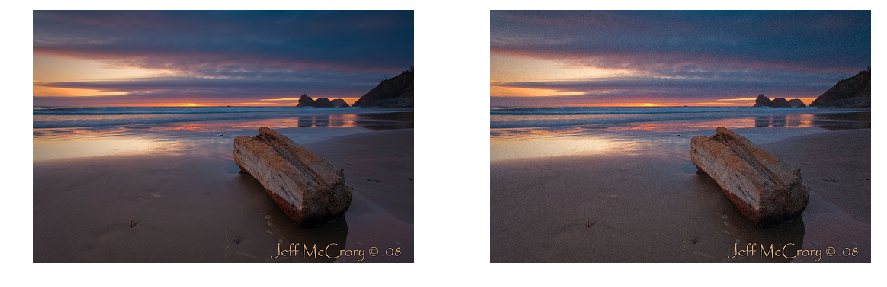

In [95]:
i = 8
f = files[i]
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.imshow(imread(pref + f))
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(add_noise(imread(pref + f)/255., 2e-4))
plt.axis('off')

### Cropping 

In [104]:
def gen_cropped(image, alpha):
    H, W, _ = image.shape
    new_H, new_W = int(H*alpha), int(W*alpha)
    new_y0, new_x0 = np.random.randint(0,H-new_H+1), np.random.randint(0,W-new_W+1)
    return image[new_y0:(new_y0+new_H),new_x0:(new_x0+new_W),:]

(-0.5, 574.5, 436.5, -0.5)

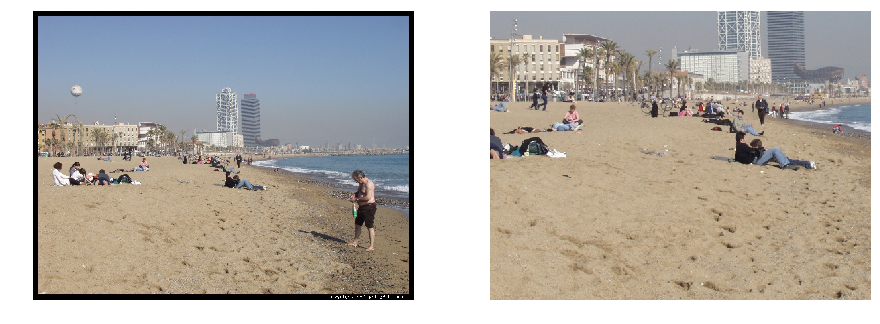

In [113]:
i = 2
f = files[i]
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.imshow(imread(pref + f))
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(gen_cropped(imread(pref + f)/255., 0.5))
plt.axis('off')